In [1]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

In [2]:
# df=pd.read_csv('C:/Users/pudge/Downloads/EURRUB_200217_220317 (1).txt',sep=';',parse_dates=['<DATE>'])
# df=df.rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<HIGH>':'HIGH','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<TIME>':'TIME'})

In [3]:
# df['HOUR']=hour_list

In [4]:
# df['HOUR_COS'] = df['HOUR'].apply(lambda x: math.cos(x * 2 * math.pi / 24))
# df['HOUR_SIN'] =  df['HOUR'].apply(lambda x: math.sin(x * 2 * math.pi / 24))
# df.head()

In [5]:
# df.to_csv('EURUB.csv')

In [6]:
df = pd.read_csv('../input/eurrub/EURUB.csv', )

df.tail()

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HOUR,HOUR_COS,HOUR_SIN
13307,13307,2022-03-17,200000,114.386,115.815,114.386,115.705,6,12,-1.000000,1.224647e-16
13308,13308,2022-03-17,210000,115.214,115.214,114.307,114.307,12,13,-0.965926,-2.588190e-01
13309,13309,2022-03-17,220000,114.289,114.289,114.040,114.040,8,14,-0.866025,-5.000000e-01
13310,13310,2022-03-17,230000,114.042,114.846,114.042,114.839,11,15,-0.707107,-7.071068e-01
13311,13311,2022-03-18,0,113.960,113.960,113.944,113.944,3,16,-0.500000,-8.660254e-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13312 entries, 0 to 13311
Data columns (total 11 columns):
Unnamed: 0    13312 non-null int64
DATE          13312 non-null object
TIME          13312 non-null int64
OPEN          13312 non-null float64
HIGH          13312 non-null float64
LOW           13312 non-null float64
CLOSE         13312 non-null float64
VOL           13312 non-null int64
HOUR          13312 non-null int64
HOUR_COS      13312 non-null float64
HOUR_SIN      13312 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.1+ MB


In [8]:
df_day = df[df['HOUR']==12]

In [9]:
df_day.head()

,Unnamed: 0,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HOUR,HOUR_COS,HOUR_SIN
11,11,2020-02-17,120000,68.5798,68.6910,68.5224,68.6717,6560,12,-1.0,1.224647e-16
35,35,2020-02-18,120000,69.1413,69.1875,68.9721,69.0699,7113,12,-1.0,1.224647e-16
59,59,2020-02-19,120000,68.6987,68.7970,68.6419,68.7573,6924,12,-1.0,1.224647e-16
83,83,2020-02-20,120000,68.7061,68.9059,68.6464,68.8996,7150,12,-1.0,1.224647e-16
107,107,2020-02-21,120000,69.4257,69.6400,69.3659,69.5110,7496,12,-1.0,1.224647e-16


In [10]:
from sklearn.model_selection import train_test_split
train_columns = ['DATE','OPEN']
train = df_day[train_columns][:-30]
train = train.rename(columns={'DATE':'ds','OPEN':'y'})
df_day = df_day.rename(columns={'DATE':'ds','OPEN':'y'})


In [11]:
df_columns = ['ds','y']

In [12]:
m = Prophet(daily_seasonality=False,yearly_seasonality=True)
m.fit(train)

In [13]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(18)

In [14]:
# figure = m.plot(forecast)

In [15]:
# # Смотрим на ошибки модели
# predictions = 30
# cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(train.set_index('ds'))
# cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
# cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
# print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df[-predictions:]['p'])),'%')
# print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df[-predictions:]['e'])))

In [16]:
# fig_decompose = m.plot_components(forecast)

In [17]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='180 days', period='30 days', horizon = '60 days')

INFO:fbprophet.diagnostics:Making 16 forecasts with cutoffs between 2020-09-05 00:00:00 and 2021-11-29 00:00:00


In [18]:
df_p = performance_metrics(df_cv, rolling_window = 0.1)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
269,6 days,12.578866,3.546670,2.661405,0.029945,0.428571
578,6 days,12.591639,3.548470,2.671910,0.030074,0.428571
534,6 days,12.472733,3.531676,2.643249,0.029767,0.442857
490,7 days,12.580099,3.546843,2.677135,0.030162,0.428571
225,7 days,12.733939,3.568464,2.712030,0.030554,0.414286


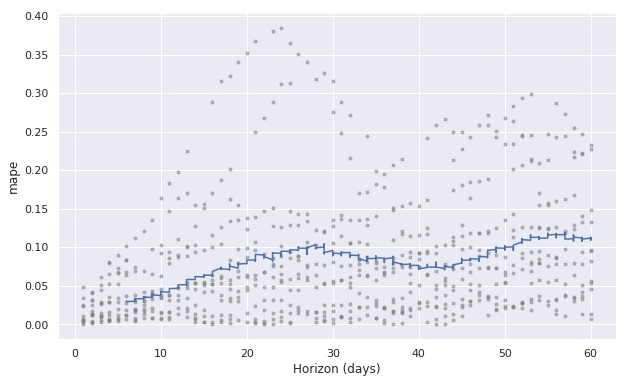

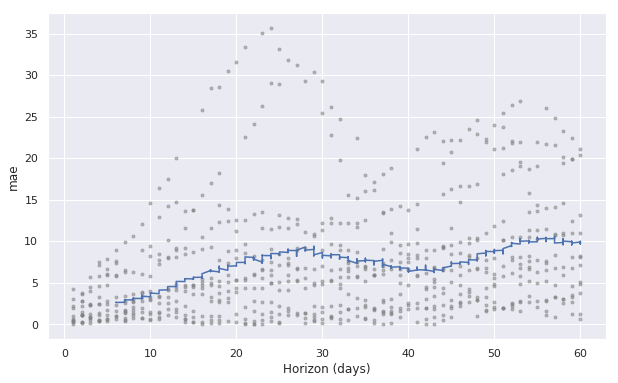

In [19]:
from fbprophet.plot import plot_cross_validation_metric
fig1 = plot_cross_validation_metric(df_cv, metric='mape')
fig2 = plot_cross_validation_metric(df_cv, metric='mae')

In [20]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

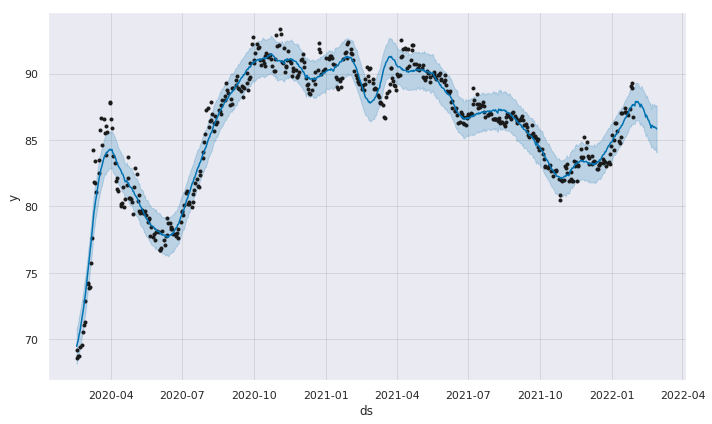

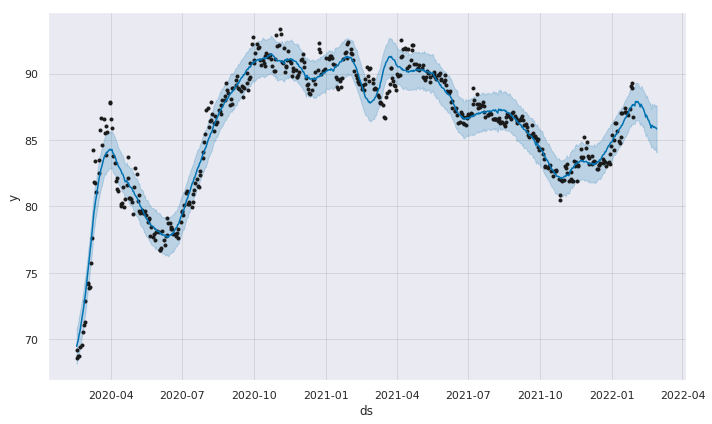

In [21]:
m.plot(forecast)

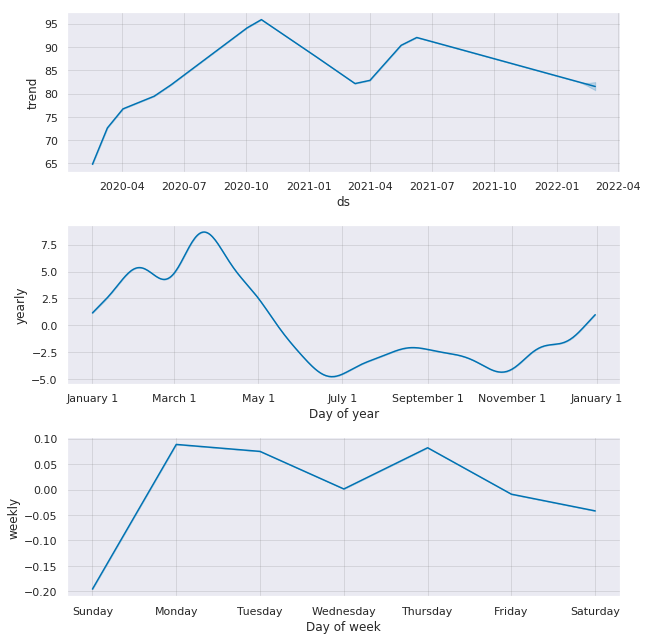

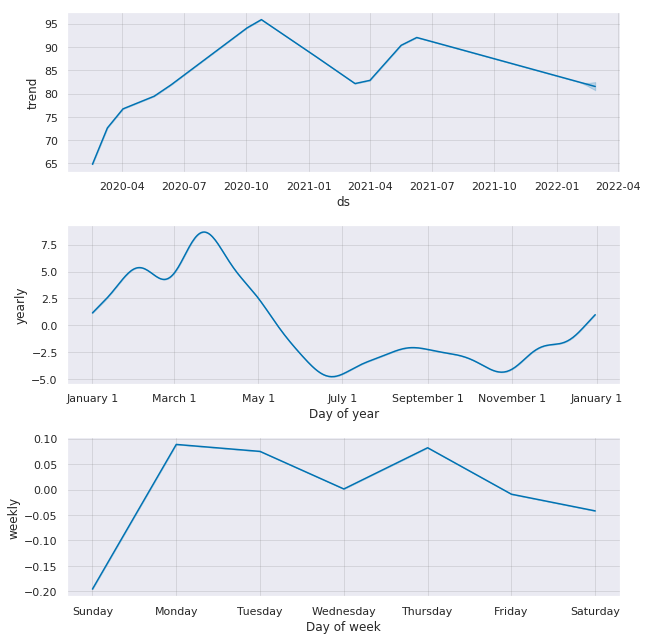

In [22]:
m.plot_components(forecast)

In [23]:
# Рисуем график с границами прогноза
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

iplot([
    go.Scatter(x=train['ds'], y=train['y'], name='fact'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='prediction'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='trend')
])

/opt/conda/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



In [24]:
# Смотрим на фактические ошибки модели
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_day[df_columns].set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df[-30:]['p'])),'%')
print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df[-30:]['e'])))

MAPE (средняя абсолютная ошибка в процентах) –  2.5360427303586275 %
MAE (средняя абсолютная ошибка) –  2.2957779451780813
